In [39]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from   astropy.table import Table, vstack
from   scipy.spatial import KDTree

os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

from   findfile        import findfile, fetch_header
from   cosmo           import  volcom
from   schechter       import  named_schechter

In [40]:
from lumfn import lumfn

abacus_cube

In [41]:
survey = 'abacus_cube'
dryrun = True

In [42]:
fpath   = findfile(ftype='gold', dryrun=dryrun, survey=survey)
fpath

DEBUG: findfile returns /global/cscratch1/sd/ldrm11/norberg/GAMA4//abacus_cube_gold_dryrun.fits


'/global/cscratch1/sd/ldrm11/norberg/GAMA4/abacus_cube_gold_dryrun.fits'

In [43]:
#abacus_gold = Table.read(fpath)
#abacus_gold

In [44]:
# narrow slice in z-direction
'''
if not dryrun:
    keep = np.absolute(abacus_gold['CARTESIAN_Z']) < 1
    abacus_gold = abacus_gold[keep]

plt.figure(dpi=250)
plt.scatter(abacus_gold['CARTESIAN_X'], abacus_gold['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)
plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$y~/~h^{-1}\mathrm{Mpc}$")
#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)
plt.show()
'''

'\nif not dryrun:\n    keep = np.absolute(abacus_gold[\'CARTESIAN_Z\']) < 1\n    abacus_gold = abacus_gold[keep]\n\nplt.figure(dpi=250)\nplt.scatter(abacus_gold[\'CARTESIAN_X\'], abacus_gold[\'CARTESIAN_Y\'], s=1, edgecolor="none", alpha=0.5)\nplt.xlabel(r"$x~/~h^{-1}\\mathrm{Mpc}$")\nplt.ylabel(r"$y~/~h^{-1}\\mathrm{Mpc}$")\n#plt.xlim(-1000,1000)\n#plt.ylim(-1000,1000)\nplt.show()\n'

In [45]:
fpath2 = fpath.replace('gold', 'gold_padded')
fpath2

'/global/cscratch1/sd/ldrm11/norberg/GAMA4/abacus_cube_gold_padded_dryrun.fits'

In [46]:
abacus_gold_padded = Table.read(fpath2)
abacus_gold_padded

<Table length=57352>
    CARTESIAN_X         CARTESIAN_Y         CARTESIAN_Z     ... GALTYPE REP_GAL
      float64             float64             float64       ...  int32   int64 
------------------- ------------------- ------------------- ... ------- -------
-49.817718505859375  -49.61811828613281  32.986026763916016 ...       0       0
 -49.96013259887695   -49.7046012878418   33.12670135498047 ...       0       0
-49.912437438964844 -47.793983459472656    24.6711368560791 ...       0       0
 -49.97426986694336  -43.30756378173828  27.834810256958008 ...       0       0
 -49.85676574707031 -39.754695892333984   -19.8656063079834 ...       0       0
 -49.97376251220703 -31.873416900634766 -43.020999908447266 ...       0       0
 -49.90583038330078 -27.293285369873047 -31.811431884765625 ...       0       0
 -49.83670425415039  -17.01017189025879  -20.26968765258789 ...       0       0
 -49.90540313720703 -17.321521759033203  44.048683166503906 ...       0       0
-49.946449279785156  -12.51128101348877  45.258636474609375 ...       0       0
                ...                 ...                 ... ...     ...     ...
  -56.1904411315918    56.5994873046875   56.33990478515625 ...       0       1
 -56.79065704345703   57.95985412597656   53.15591049194336 ...       0       1
-56.941158294677734  58.082523345947266   52.84288024902344 ...       0       1
-55.529197692871094   53.70353317260742   51.50450897216797 ...       0       1
 -55.60472106933594  54.307743072509766  52.947914123535156 ...       0       1
-55.739295959472656   56.71227264404297   54.70640182495117 ...       0       1
-54.835758209228516  56.678802490234375    56.8793830871582 ...       0       1
 -54.21456527709961   53.91340637207031  51.057228088378906 ...       0       1
 -52.49437713623047   59.61195755004883    53.8782844543457 ...       0       1
-50.670692443847656   52.87421798706055   51.38710021972656 ...       0       1

In [47]:
max(abacus_gold_padded['CARTESIAN_X'])

59.98353958129883

In [48]:
edge = (abacus_gold_padded['REP_GAL'] == 1)

In [49]:
# TODO: add to header
# WARNING/HACK - only holds for dryrun

if dryrun:
    boundary = 50
    pad = 10
    
else:
    boundary = 1000
    pad = 100

In [50]:
len(abacus_gold_padded)

57352

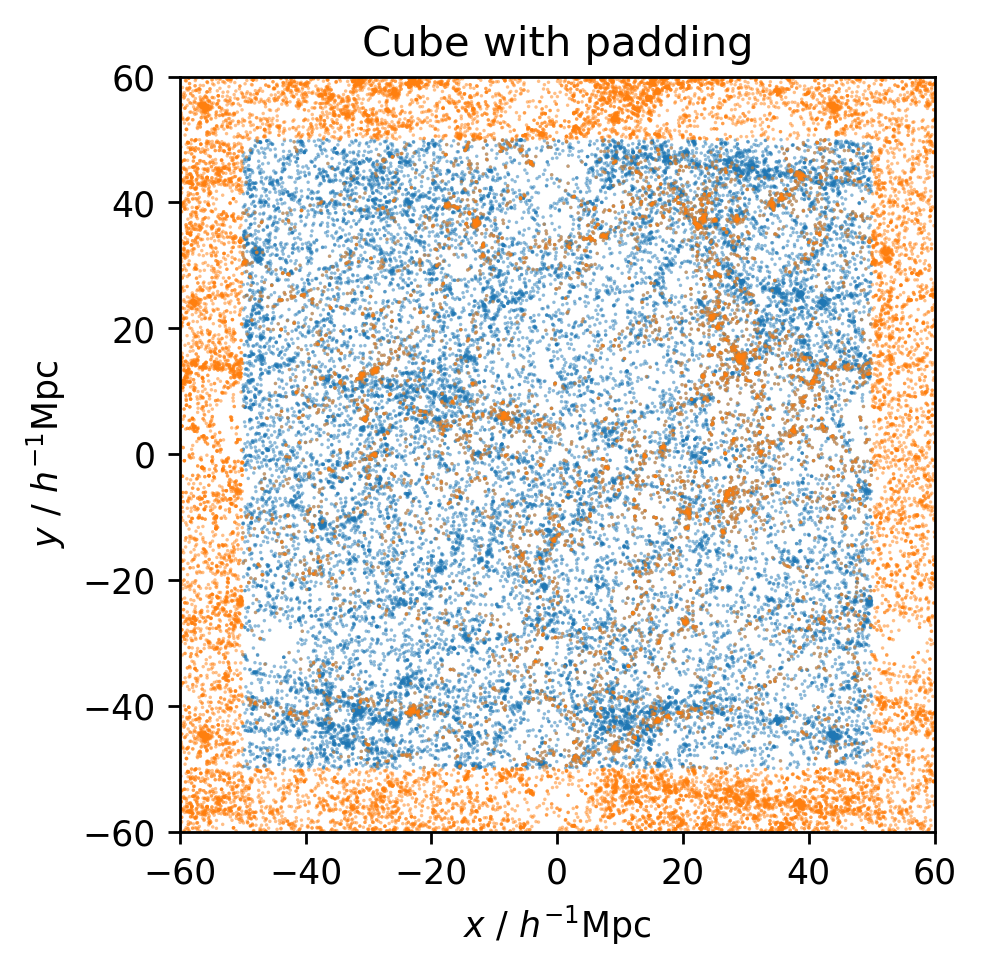

In [51]:
# narrow slice in z-direction
dat = abacus_gold_padded

if not dryrun:
    keep = np.absolute(abacus_gold_padded['CARTESIAN_Z']) < 1
    dat = abacus_gold_padded[keep]

edge = (dat['REP_GAL'] == 1)
    
plt.figure(dpi=250)
plt.scatter(dat[~edge]['CARTESIAN_X'], dat[~edge]['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)
plt.scatter(dat[edge]['CARTESIAN_X'], dat[edge]['CARTESIAN_Y'], s=1, edgecolor="none", alpha=0.5)

plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$y~/~h^{-1}\mathrm{Mpc}$")

lim = boundary + pad
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.gca().set_aspect('equal')
plt.title('Cube with padding')
plt.show()

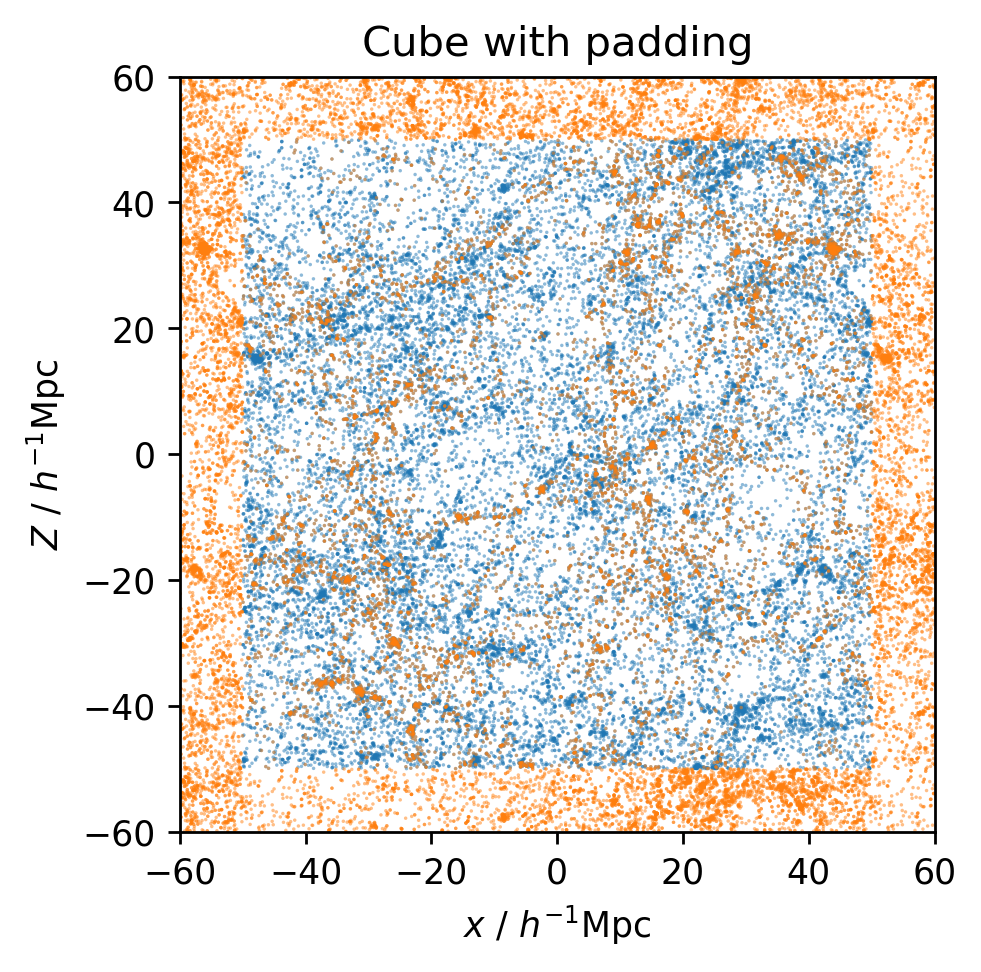

In [52]:
dat = abacus_gold_padded

# narrow slice in y-direction
if not dryrun:
    keep = np.absolute(abacus_gold_padded['CARTESIAN_Y']) < 1
    dat = abacus_gold_padded[keep]

edge = (dat['REP_GAL'] == 1)

plt.figure(dpi=250)
plt.scatter(dat[~edge]['CARTESIAN_X'], dat[~edge]['CARTESIAN_Z'], s=1, edgecolor="none", alpha=0.5)
plt.scatter(dat[edge]['CARTESIAN_X'], dat[edge]['CARTESIAN_Z'], s=1, edgecolor="none", alpha=0.5)

plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$Z~/~h^{-1}\mathrm{Mpc}$")

lim = boundary + pad
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.gca().set_aspect('equal')
plt.title('Cube with padding')
plt.show()

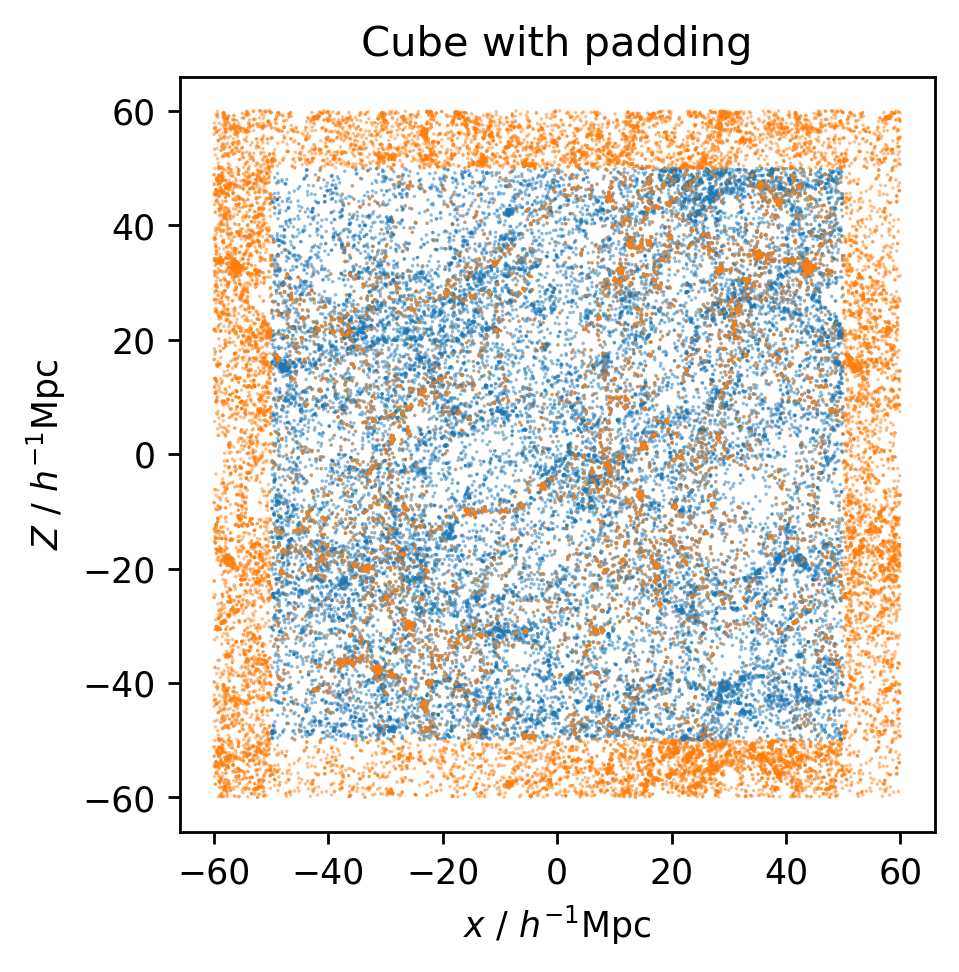

In [53]:
dat = abacus_gold_padded

# narrow slice in y-direction
if not dryrun:
    keep = np.absolute(abacus_gold_padded['CARTESIAN_Y']) < 1
    dat = abacus_gold_padded[keep]

edge = (dat['REP_GAL'] == 1)

plt.figure(dpi=250)
plt.scatter(dat[~edge]['CARTESIAN_X'], dat[~edge]['CARTESIAN_Z'], s=1, edgecolor="none", alpha=0.5)
plt.scatter(dat[edge]['CARTESIAN_X'], dat[edge]['CARTESIAN_Z'], s=1, edgecolor="none", alpha=0.5)

plt.xlabel(r"$x~/~h^{-1}\mathrm{Mpc}$")
plt.ylabel(r"$Z~/~h^{-1}\mathrm{Mpc}$")

lim = boundary + pad
#plt.xlim(900,1100)
#plt.ylim(900,1100)
plt.gca().set_aspect('equal')
plt.title('Cube with padding')
plt.show()

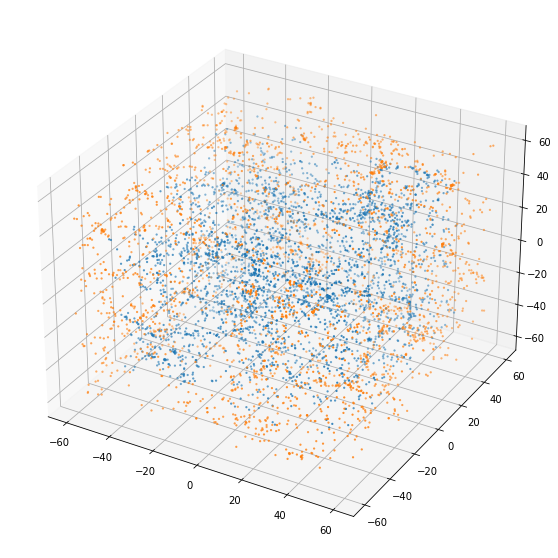

In [54]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

dat = abacus_gold_padded
edge = (dat['REP_GAL'] == 1)

pos = np.c_[dat[~edge]['CARTESIAN_X'], dat[~edge]['CARTESIAN_Y'], dat[~edge]['CARTESIAN_Z']]
pos_edge = np.c_[dat[edge]['CARTESIAN_X'], dat[edge]['CARTESIAN_Y'], dat[edge]['CARTESIAN_Z']]

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.scatter(pos_edge[::10, 0],\
           pos_edge[::10, 1],\
           pos_edge[::10, 2],\
           marker='.',\
           lw=0.0)

(array([   7.,   15.,   35.,  102.,  166.,  328.,  502.,  671.,  940.,
        1206., 1489., 1851., 2092., 2376., 2675., 2981., 3330., 3400.,
        3762., 3855.]),
 array([-22.76494374, -22.52670391, -22.28846408, -22.05022425,
        -21.81198442, -21.57374459, -21.33550476, -21.09726493,
        -20.8590251 , -20.62078528, -20.38254545, -20.14430562,
        -19.90606579, -19.66782596, -19.42958613, -19.1913463 ,
        -18.95310647, -18.71486664, -18.47662682, -18.23838699,
        -18.00014716]),
 [<matplotlib.patches.Polygon at 0x1554c06e5790>])

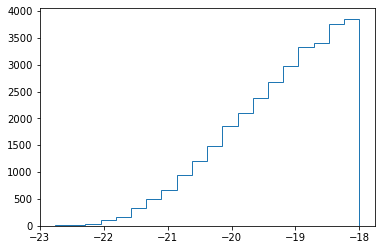

In [55]:
dat = abacus_gold_padded
edge = (dat['REP_GAL'] == 1)
plt.hist(abacus_gold_padded[~edge]['DETMAG'], bins=20, histtype='step')

In [56]:
# calculate abs. mag (add e-correction)

'''
Q = 0.97
z_ref = 0.1
#dat['DDPMALL_0P1'] = dat['DETMAG'] + Q*(dat['ZSURV'] - z_ref)
'''

"\nQ = 0.97\nz_ref = 0.1\n#dat['DDPMALL_0P1'] = dat['DETMAG'] + Q*(dat['ZSURV'] - z_ref)\n"

In [57]:
# short-term naming correction
# TODO: change; WARNING: Note this is actually 0P1!!!

dat['MCOLOR_0P1'] = dat['DETMAG']

In [58]:
# Define DDP galaxies
# Currently assume selection in abs_mag only; WARNING, not e-corrected

# TODO: read this in
tmr_DDP1       = [-21.8, -20.1]

inddp = (dat['MCOLOR_0P1'] >= tmr_DDP1[0]) & (dat['MCOLOR_0P1'] <= tmr_DDP1[1])
ddp = dat[inddp]

In [59]:
points       = np.c_[dat['CARTESIAN_X'], dat['CARTESIAN_Y'], dat['CARTESIAN_Z']]
points       = np.array(points, copy=True)

kd_tree_all  = KDTree(points)

# ----  Calculate DDPX_N8 for each gama gold galaxy.  ----
for idx in range(1):
    # Calculate DDP1/2/3 N8 for all gold galaxies.
    ddp_idx      = idx + 1

    dat['DDP{:d}_N8'.format(ddp_idx)] = -99
    
    if 'abacus' in survey:
        print('Building tree for DDP {}'.format(ddp_idx))

        # TODO / HACK: NO DDP Selection
        #ddp           = dat_field[dat_field['DDP'][:,idx] == 1]
        ddp = ddp
        
        points_ddp    = np.c_[ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], ddp['CARTESIAN_Z']]
        points_ddp    = np.array(points_ddp, copy=True)
        
        kd_tree_ddp   = KDTree(points_ddp)

        print('Querying tree for DDP {}'.format(ddp_idx))

        indexes_ddp   = kd_tree_all.query_ball_tree(kd_tree_ddp, r=8.)

        counts        = np.array([len(idx) for idx in indexes_ddp]) 

        dat['DDP{:d}_N8'.format(ddp_idx)] = counts
    
    
    else:
        for field in fields:
            print('Building tree for DDP {} and field {}'.format(ddp_idx, field))

            in_field      = dat['FIELD'] == field
            dat_field     = dat[in_field]

            # TODO / HACK: NO DDP Selection
            #ddp           = dat_field[dat_field['DDP'][:,idx] == 1]
            ddp = ddp

            points_ddp    = np.c_[ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], ddp['CARTESIAN_Z']]
            points_ddp    = np.array(points_ddp, copy=True)

            kd_tree_ddp   = KDTree(points_ddp)

            print('Querying tree for DDP {}'.format(ddp_idx))

            indexes_ddp   = kd_tree_all.query_ball_tree(kd_tree_ddp, r=8.)

            counts        = np.array([len(idx) for idx in indexes_ddp]) 

            dat['DDP{:d}_N8'.format(ddp_idx)][in_field] = counts[in_field] 

Building tree for DDP 1
Querying tree for DDP 1


In [60]:
# assume fillfactor = 1
dat['FILLFACTOR'] = 1

In [61]:
volume = (boundary*2)**3 
dat.meta['DDP1_VZ']   = volume

dat.meta['DDP{}_NGAL'.format(1)] = np.count_nonzero(ddp) 
dat.meta['DDP{}_DENS'.format(1)] = np.count_nonzero(ddp) / dat.meta['DDP{}_VZ'.format(1)] 

In [62]:
def gen_delta8(dat, ddp=1):
    # TODO: import radius in
    dat.meta['VOL8']   = (4./3.)*np.pi*(8.**3.)
    dat['DDP1_DELTA8'] = ((dat['DDP{}_N8'.format(ddp)] / (dat.meta['VOL8'] * dat.meta['DDP{}_DENS'.format(ddp)]) / dat['FILLFACTOR'])) - 1. 

In [63]:
gen_delta8(abacus_gold_padded, ddp=1)

Text(0, 0.5, 'N')

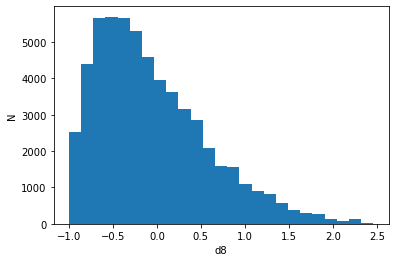

In [64]:
plt.hist(dat['DDP1_DELTA8'], bins=25)
plt.xlabel('d8')
plt.ylabel('N')

In [65]:
dat.dtype.names

('CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'DETMAG',
 'GMR',
 'GALTYPE',
 'REP_GAL',
 'MCOLOR_0P1',
 'DDP1_N8',
 'FILLFACTOR',
 'DDP1_DELTA8')

Text(0, 0.5, 'd8')

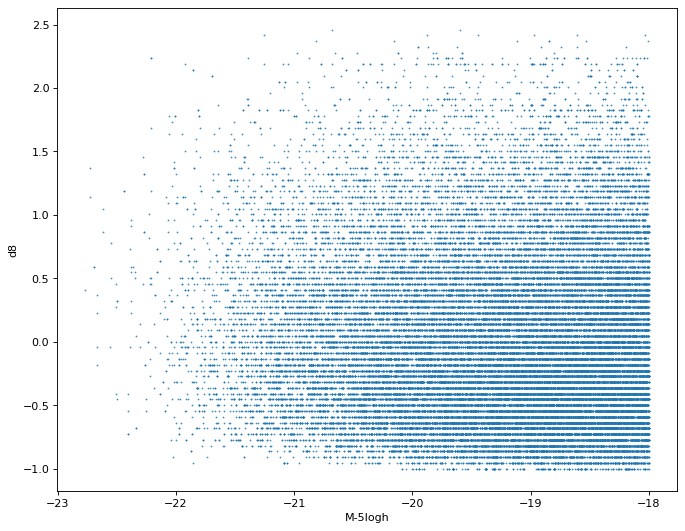

In [66]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

plt.scatter(dat['DETMAG'], dat['DDP1_DELTA8'], s=0.25)
plt.xlabel('M-5logh')
plt.ylabel('d8')

In [67]:
dat.meta['DDP{}_DENS'.format(1)]

0.010241

In [69]:
vol8   = (4./3.)*np.pi*(8.**3.)
p8_1 = ((1 / vol8 * dat.meta['DDP{}_DENS'.format(1)]) / 1) - 1.
p8_2 = ((2 / vol8 * dat.meta['DDP{}_DENS'.format(1)]) / 1) - 1.

(1.0, 2.0)

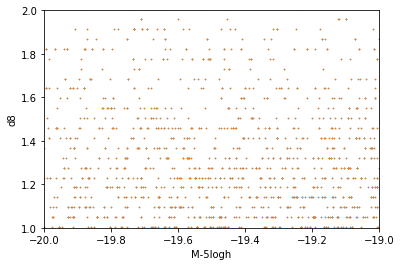

In [70]:
plt.scatter(dat['DETMAG'], dat['DDP1_DELTA8'], s=0.25)
plt.xlabel('M-5logh')
plt.ylabel('d8')
plt.xlim(-20, -19)
plt.ylim(-1, 0)

plt.scatter(dat['DETMAG'], dat['DDP1_DELTA8'], s=0.25)
plt.xlabel('M-5logh')
plt.ylabel('d8')
plt.xlim(-20, -19)
plt.ylim(1, 2)

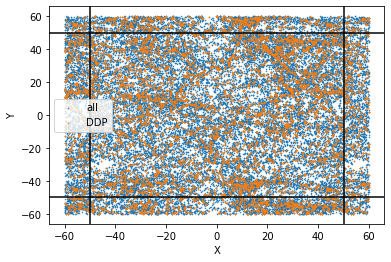

In [71]:
plt.scatter(dat['CARTESIAN_X'], dat['CARTESIAN_Y'], s=0.25, label='all')
plt.scatter(ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], s=0.5, label='DDP')

plt.axhline(-boundary, c='black')
plt.axhline(boundary, c='black')
plt.axvline(-boundary, c='black')
plt.axvline(boundary, c='black')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

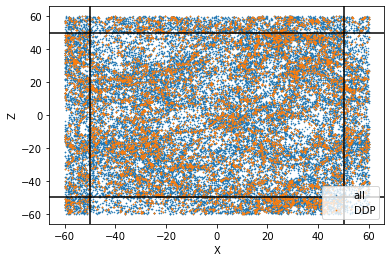

In [72]:
plt.scatter(dat['CARTESIAN_X'], dat['CARTESIAN_Z'], s=0.25, label='all')
plt.scatter(ddp['CARTESIAN_X'], ddp['CARTESIAN_Z'], s=0.5, label='DDP')

plt.axhline(-boundary, c='black')
plt.axhline(boundary, c='black')
plt.axvline(-boundary, c='black')
plt.axvline(boundary, c='black')

plt.xlabel('X')
plt.ylabel('Z')
plt.legend()

In [73]:
len(dat) / volume

0.057352

In [74]:
len(ddp) / volume

0.010241

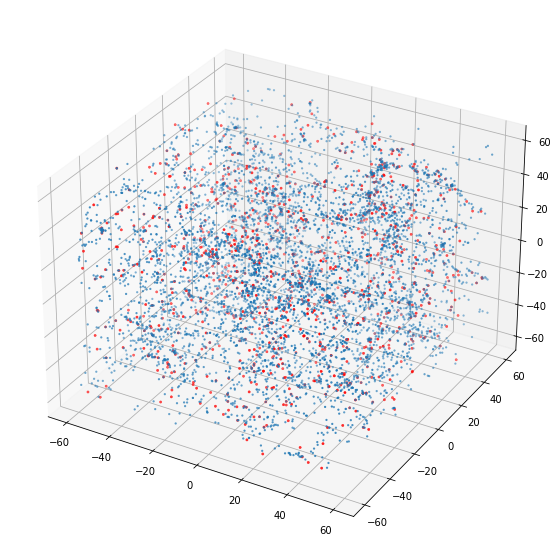

In [75]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

pos = np.c_[dat['CARTESIAN_X'], dat['CARTESIAN_Y'], dat['CARTESIAN_Z']]
pos_ddp = np.c_[ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], ddp['CARTESIAN_Z']]

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.scatter(pos_ddp[::10, 0],\
           pos_ddp[::10, 1],\
           pos_ddp[::10, 2],\
           marker='.',\
           color = 'red',\
           lw=0.5)

Text(0.5, 1.0, 'DDPs')

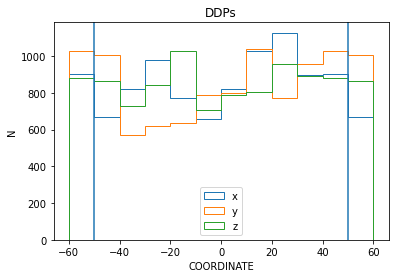

In [77]:
# check ddp_density constant in x-direction:

bins = np.arange(-boundary-pad, boundary+pad+0.1, boundary/5)

plt.hist(ddp['CARTESIAN_X'], bins=bins, histtype='step', label='x')
plt.hist(ddp['CARTESIAN_Y'], bins=bins, histtype='step', label='y')
plt.hist(ddp['CARTESIAN_Z'], bins=bins, histtype='step', label='z')

plt.axvline(-boundary)
plt.axvline(boundary)
plt.legend()
plt.xlabel('COORDINATE')
plt.ylabel('N')
plt.title('DDPs')

Text(0.5, 1.0, 'All')

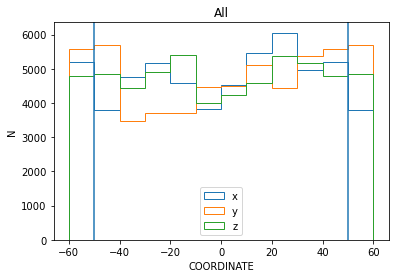

In [78]:
plt.hist(dat['CARTESIAN_X'], bins=bins, histtype='step', label='x')
plt.hist(dat['CARTESIAN_Y'], bins=bins, histtype='step', label='y')
plt.hist(dat['CARTESIAN_Z'], bins=bins, histtype='step', label='z')

plt.axvline(-boundary)
plt.axvline(boundary)
plt.legend()
plt.xlabel('COORDINATE')
plt.ylabel('N')
plt.title('All')

In [79]:
# TESTING FOR LF work

In [88]:
dat['VMAX'] = (boundary*2)**3 
dat['MCOLOR_0P0'] = dat['DETMAG']
dat.meta['FORCE_VOL'] = (boundary*2)**3 

In [89]:
dat_LF = dat[~edge]

In [90]:
result = lumfn(dat_LF)



Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
-22.688161818348362 -22.691575479333682 ...  0.792200021474484
  -22.5027768455281 -22.495692383836076 ... 0.5336630475628167
 -22.26898106255763 -22.287076414923735 ... 0.5641663830678441
-22.059753197798493  -22.07008299134401 ... 0.5623006169571708
-21.885735943769454  -21.89019700515741 ...  0.759067528859104
-21.697481387761314  -21.69848673368193 ... 0.7732239206384929
 -21.49284222949347 -21.492518500805737 ... 0.9330697349507486
-21.284914826979506 -21.291296196614944 ... 0.8719227119157786
      

In [91]:
from astropy.io import ascii

/tmp/ipykernel_64229/1513172858.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']), label='CUBE')


Text(0, 0.5, 'PHI')

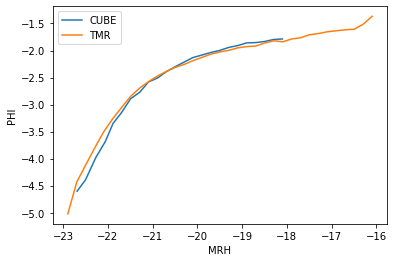

In [92]:
plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']), label='CUBE')


fpath4 = '/global/u2/l/ldrm11/DESI/data/tmr_ref_stepwise.txt'
TMR = ascii.read(fpath4)
plt.plot(TMR['col1'], TMR['col2'], label='TMR')

plt.legend()
plt.xlabel('MRH')
plt.ylabel('PHI')



Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ... 195.64912507392341
-22.496885907095358 -22.478813049060193 ... 122.81156534444496
-22.267628909441427  -22.28564801658828 ...  134.6254817575195
 -22.06388430792063  -22.07329997547473 ... 120.57265708187424
-21.885735943769454  -21.88917946337076 ... 181.43313098852374
-21.691507503169934 -21.694694053627092 ... 162.85944973369732
-21.491414336984025  -21.49113632500343 ... 210.49130411874032
 -21.28497386618524  -21.29029310953033 ... 204.03069810690485
      

/tmp/ipykernel_16700/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ...  97.82456253696171
-22.496885907095358 -22.478813049060193 ...  61.40578267222248
-22.267628909441427  -22.28564801658828 ...  67.31274087875975
 -22.06388430792063  -22.07329997547473 ...  60.28632854093712
-21.885735943769454  -21.88917946337076 ...  90.71656549426187
-21.691507503169934 -21.694694053627092 ...  81.42972486684866
-21.491414336984025  -21.49113632500343 ... 105.24565205937016
 -21.28497386618524  -21.29029310953033 ... 102.01534905345243
      

/tmp/ipykernel_16700/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ...  65.21637502464115
-22.496885907095358 -22.478813049060193 ... 40.937188448148326
-22.267628909441427  -22.28564801658828 ...  44.87516058583983
 -22.06388430792063  -22.07329997547473 ...  40.19088569395808
-21.885735943769454  -21.88917946337076 ...  60.47771032950792
-21.691507503169934 -21.694694053627092 ...  54.28648324456577
-21.491414336984025  -21.49113632500343 ...   70.1637680395801
 -21.28497386618524  -21.29029310953033 ...  68.01023270230162
      

/tmp/ipykernel_16700/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))




Solving for Ms: [-23.  -22.8 -22.6 -22.4 -22.2 -22.  -21.8 -21.6 -21.4 -21.2 -21.  -20.8
 -20.6 -20.4 -20.2 -20.  -19.8 -19.6 -19.4 -19.2 -19.  -18.8 -18.6 -18.4
 -18.2 -18.  -17.8 -17.6 -17.4 -17.2 -17.  -16.8 -16.6 -16.4 -16.2 -16. ]
      MEDIAN_M             MEAN_M       ...     REF_RATIO     
------------------- ------------------- ... ------------------
              -22.9               -22.9 ...                0.0
              -22.7               -22.7 ...                0.0
 -22.66528940888928 -22.680126352346477 ... 48.912281268480854
-22.496885907095358 -22.478813049060193 ...  30.70289133611124
-22.267628909441427  -22.28564801658828 ...  33.65637043937988
 -22.06388430792063  -22.07329997547473 ...  30.14316427046856
-21.885735943769454  -21.88917946337076 ... 45.358282747130936
-21.691507503169934 -21.694694053627092 ...  40.71486243342433
-21.491414336984025  -21.49113632500343 ...  52.62282602968508
 -21.28497386618524  -21.29029310953033 ...  51.00767452672621
      

/tmp/ipykernel_16700/4114592759.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))


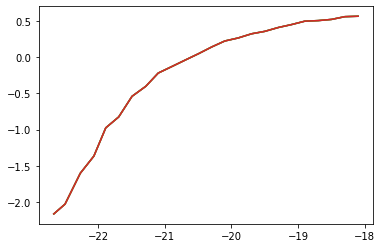

In [43]:
for d8 in [0, 1, 2, 3]:
    result = lumfn(dat, d8=d8)
    plt.plot(result['MEDIAN_M'], np.log10(result['PHI_IVMAX']))

In [ ]:
# TESTING NEW FUNCTIONS:

In [ ]:
import os
import sys
import fitsio
import argparse
import runtime
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table, vstack
from   scipy.spatial import KDTree
from   delta8_limits import delta8_tier, d8_limits
from   findfile      import findfile, fetch_fields, overwrite_check, gather_cat, write_desitable, fetch_header
from   config        import Configuration
from   bitmask       import lumfn_mask, consv_mask, update_bit
from   delta8_limits import d8_limits
from   runtime       import calc_runtime
from   params        import fillfactor_threshold, oversample_nrealisations, sphere_radius

In [ ]:


#args        = parser.parse_args()
#log         = args.log
#realz       = args.realz
#dryrun      = args.dryrun
#survey      = args.survey.lower()
#oversample  = args.oversample

log = False
realz = 0
dryrun = True
survey = 'abacus_cube'
oversample = 2

'''
TODO: should have an independent path of DDPs for abacus_cube generated
'''



### BLOCK ###

if args.oversample_nrealisations != None:
    oversample_nrealisations = int(args.oversample_nrealisations)
  
    print(f'Overriding number of oversampled realizations used with {oversample_nrealisations}')

fields      = fetch_fields(survey)

fpath       = findfile(ftype='ddp',    dryrun=dryrun, survey=survey)
opath       = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey)

if log:
    logfile = findfile(ftype='ddp_n8', dryrun=False, survey=survey, log=True)

    print(f'Logging to {logfile}')
        
    sys.stdout = open(logfile, 'w')

if args.nooverwrite:
    overwrite_check(opath)
    
# Read ddp cat.    
dat           = Table.read(fpath)

print('Reading: {} with length {}'.format(fpath, len(dat)))

assert 'DDP1_DENS' in dat.meta

points       = np.c_[dat['CARTESIAN_X'], dat['CARTESIAN_Y'], dat['CARTESIAN_Z']]
points       = np.array(points, copy=True)

kd_tree_all  = KDTree(points)

### BLOCK ###








'''
PUT FOLLOWING INTO FUNCTION
'''


# Oversampled randoms 
prefix           = 'randoms_ddp1'
dat['RAND_N8']   = 0.

for realz in np.arange(oversample_nrealisations):
    print(f'\n\nSolving for galaxy fillfactors with oversampled realization {realz}.')

    rpaths       = [findfile(ftype='randoms', dryrun=dryrun, field=ff, survey=survey, prefix=prefix, oversample=oversample, realz=realz) for ff in fields]

    for rpath in rpaths:
        print('Fetching: {}'.format(rpath))

    orand        = gather_cat(rpaths)

    orpoints     = np.c_[orand['CARTESIAN_X'], orand['CARTESIAN_Y'], orand['CARTESIAN_Z']]

    print('Creating oversample rand. tree.')

    obig_tree       = KDTree(orpoints)
    
    indexes_dat     = kd_tree_all.query_ball_tree(obig_tree, r=8.)
    dat['RAND_N8'] += np.array([len(idx) for idx in indexes_dat])

    print('After solving for realization {}, median number of randoms per 8-sphere is {}'.format(realz, np.median(dat['RAND_N8'])))
    
del orand
del orpoints
del obig_tree

hpath               = findfile(ftype='randoms_n8', dryrun=dryrun, field=fields[0], survey=survey, prefix=prefix, oversample=1, realz=0)

print(f'Fetching header information from {hpath}')

onrand8             = oversample_nrealisations * oversample * fetch_header(fpath=hpath, name='NRAND8')
ordens              = oversample_nrealisations * oversample * fetch_header(fpath=hpath, name='RAND_DENS') 

dat['FILLFACTOR']   = dat['RAND_N8'] / onrand8

print('Normalised galaxy fill factors with {:.2f} expected randoms per 8-sphere (density: {:.6e}).'.format(onrand8, ordens))


# ----  Find closest matching oversampled random to inherit bounddist  ----
print('Finding bound dist measure.')

bpaths              = [findfile(ftype='randoms_n8', dryrun=dryrun, field=ff, survey=survey, prefix=prefix) for ff in fields]
boundary            = [Table.read(bpath, 'BOUNDARY') for bpath in bpaths]

# TODO Note: BOUNDID will not be unique.
boundary            = vstack(boundary)
boundary            = np.c_[boundary['CARTESIAN_X'], boundary['CARTESIAN_Y'], boundary['CARTESIAN_Z']]
boundary_tree       = KDTree(boundary)

body                = np.c_[dat['CARTESIAN_X'], dat['CARTESIAN_Y'], dat['CARTESIAN_Z']]
split               = [x for x in body]

dd, ii              = boundary_tree.query(split, k=1)
dat['BOUND_DIST']   = dd

dat['FILLFACTOR'][dat['BOUND_DIST'] > sphere_radius] = 1.


# ----  Find closest matching random to inherit fill factor  ----
# Read randoms bound_dist.
rpaths              = [findfile(ftype='randoms_bd', dryrun=dryrun, field=ff, survey=survey, prefix=prefix, oversample=1, realz=0) for ff in fields]

for rpath in rpaths:
    print('Reading: {}'.format(rpath))

rand                = gather_cat(rpaths)

print('Retrieved galaxies for {}'.format(np.unique(dat['FIELD'].data)))
print('Retrieved randoms for {}'.format(np.unique(rand['FIELD'].data)))

for i, rpath in enumerate(rpaths):
    dat.meta['RPATH_{}'.format(i)] = rpath

rpoints  = np.c_[rand['CARTESIAN_X'], rand['CARTESIAN_Y'], rand['CARTESIAN_Z']]

print('Creating big rand. tree.')

big_tree = KDTree(rpoints)

print('Querying tree for closest rand.')

dd, ii   = big_tree.query([x for x in points], k=1)

# Find closest random for bound_dist and fill factor. 
# These randoms are split by field.
dat['rRANDSEP']    = dd
dat['rRANDMATCH']  = rand['RANDID'][ii]
dat['rBOUND_DIST'] = rand['BOUND_DIST'][ii]
dat['rFILLFACTOR'] = rand['FILLFACTOR'][ii]

update_bit(dat['IN_D8LUMFN'], lumfn_mask, 'FILLFACTOR', dat['FILLFACTOR'].data < fillfactor_threshold)

if not dryrun:
    match_sep = 6.5

    # Typically, bounded by 1.6
    # assert  np.all(dat['rRANDSEP'].data < match_sep), 'Failed to find matching random with < 5 Mpc/h separation.'

    if not np.all(dat['rRANDSEP'].data < match_sep):
        # Note: DESI randoms are less dense, larger expected separation.
        print('WARNING: poor random match, with maximum comoving random separation >3Mpc/h.')

        poor_match = dat['rRANDSEP'].data > match_sep

        print(dat[poor_match])

# ----  Calculate DDPX_N8 for each gama gold galaxy.  ----
for idx in range(3):
    # Calculate DDP1/2/3 N8 for all gold galaxies.
    ddp_idx      = idx + 1

    dat['DDP{:d}_N8'.format(ddp_idx)] = -99
    
    for field in fields:
        print('Building tree for DDP {} and field {}'.format(ddp_idx, field))

        in_field      = dat['FIELD'] == field
        dat_field     = dat[in_field]

        ddp           = dat_field[dat_field['DDP'][:,idx] == 1]
        points_ddp    = np.c_[ddp['CARTESIAN_X'], ddp['CARTESIAN_Y'], ddp['CARTESIAN_Z']]
        points_ddp    = np.array(points_ddp, copy=True)
        
        kd_tree_ddp   = KDTree(points_ddp)

        print('Querying tree for DDP {}'.format(ddp_idx))

        indexes_ddp   = kd_tree_all.query_ball_tree(kd_tree_ddp, r=8.)

        counts        = np.array([len(idx) for idx in indexes_ddp]) 

        dat['DDP{:d}_N8'.format(ddp_idx)][in_field] = counts[in_field] 

##  Derived.
dat.meta['VOL8']   = (4./3.)*np.pi*(8.**3.)

dat['DDP1_DELTA8'] = ((dat['DDP1_N8'] / (dat.meta['VOL8'] * dat.meta['DDP1_DENS']) / dat['FILLFACTOR'])) - 1. 

##  
outwith = (dat['ZSURV'] > dat.meta['DDP1_ZMIN']) & (dat['ZSURV'] < dat.meta['DDP1_ZMAX'])
outwith = ~outwith

if not dryrun:
    # Insufficient randoms in a dryrun.
    outwith = outwith | (dat['FILLFACTOR']  < fillfactor_threshold)

dat['DDP1_DELTA8'][outwith] = -99.
dat['DDP1_DELTA8_TIER']     = delta8_tier(dat['DDP1_DELTA8'])

dat.pprint()

# TODO: Check
if 'ddp1' not in prefix:
    dat['DDP2_DELTA8'] = ((dat['DDP2_N8'] / (dat.meta['VOL8'] * dat.meta['DDP2_DENS']) / dat['FILLFACTOR'])) - 1. 
    dat['DDP3_DELTA8'] = ((dat['DDP3_N8'] / (dat.meta['VOL8'] * dat.meta['DDP3_DENS']) / dat['FILLFACTOR'])) - 1. 

for x in dat.meta.keys():
    print('{}\t\t{}'.format(x.ljust(20), dat.meta[x]))

print('Writing {}'.format(opath))

write_desitable(opath, dat)

#  ----  Generate ddp_n8_d0 files for LF(d8) files, limited to DDP1 (and redshift range)  ----
dat                     = dat[(dat['ZSURV'] > dat.meta['DDP1_ZMIN']) & (dat['ZSURV'] < dat.meta['DDP1_ZMAX'])]
dat['DDP1_DELTA8_TIER'] = delta8_tier(dat['DDP1_DELTA8'])

utiers                  = np.unique(dat['DDP1_DELTA8_TIER'].data)

if -99 in utiers:
    utiers = utiers.tolist()    
    utiers.remove(-99)
    utiers = np.array(utiers)

for ii, xx in enumerate(d8_limits):
    dat.meta['D8{}LIMS'.format(ii)] = str(xx)

if not np.all(np.isin(np.arange(9), utiers)):
    print('WARNING: MISSING d8 TIERS ({})'.format(utiers))
    
else:
    print(utiers)

print('Delta8 spans {:.4f} to {:.4f} over {} tiers.'.format(dat['DDP1_DELTA8'].min(), dat['DDP1_DELTA8'].max(), utiers))

for tier in np.arange(len(d8_limits)):
    print()
    print('---- d{} ----'.format(tier))

    isin     = (dat['DDP1_DELTA8_TIER'].data == tier)    
    to_write = dat[isin]

    dat.meta['DDP1_D{}_NGAL'.format(tier)] = len(to_write)

    assert 'AREA' in dat.meta.keys()
    assert 'AREA' in to_write.meta.keys()

    print('Available fields in tier: {}'.format(np.unique(dat['FIELD'].data)))

    for field in fields:    
        isin           = to_write['FIELD'] == field
        to_write_field = to_write[isin]

        opath_field    = findfile('ddp_n8_d0', dryrun=dryrun, field=field, utier=tier, survey=survey, realz=realz)  

        print('Writing {} galaxies from field {} to {}.'.format(len(to_write_field), np.unique(to_write_field['FIELD'].data), opath_field))

        to_write_field.meta['AREA'] = to_write.meta['AREA'] / len(fields)

        write_desitable(opath_field, to_write_field)

print('\n\nDone.\n\n')

if log:
    sys.stdout.close()
